#  AR, MA, ARMA, ARIMA 모델 비교표

| 모델     | 이름                                | 구성 요소                | 수식 형태                                                                 | 사용 조건                         | 특징 요약                                               |
|----------|-------------------------------------|--------------------------|---------------------------------------------------------------------------|-----------------------------------|----------------------------------------------------------|
| AR(p)    | AutoRegressive                     | 자기회귀항 (과거 값)     | $X_t = c + \sum_{i=1}^{p} \phi_i X_{t-i} + \varepsilon_t$                | 정상 시계열                        | 과거 관측값이 현재 값에 영향을 줌                        |
| MA(q)    | Moving Average                      | 오차항의 이동 평균       | $X_t = \mu + \sum_{i=1}^{q} \theta_i \varepsilon_{t-i} + \varepsilon_t$   | 정상 시계열                        | 과거 오차가 현재 값에 영향을 줌                          |
| ARMA(p,q)| AR + MA                             | AR + MA 결합             | $X_t = c + \sum_{i=1}^{p} \phi_i X_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \varepsilon_t$ | 정상 시계열 | 과거 값과 과거 오차 모두 반영                           |
| ARIMA(p,d,q)| ARMA + Integration (차분)       | AR + MA + 차분           | $\Delta^d X_t = ARMA(p, q)$                                               | 비정상 시계열 (단위근 있음)       | 비정상 시계열을 차분 후 ARMA 적용                         |



#### 용어 정리
---
$X_t$: 시계열의 현재 시점 값

$c$: 상수항

$\phi_i$: AR 계수

$\theta_j$: MA 계수

$\varepsilon_t$: 백색잡음 (오차항)

$d$: 차분 횟수 (non-stationary → stationary로 만드는 횟수)

$\Delta^d X_t$: $d$차 차분한 시계열

#  AR(1) 모델 예제 - 직관적으로 이해하기

##  AR(1) 모델에서 다음 값 예측 예시

### 🔸 주어진 데이터:
$X_t = [100,\ 80,\ 64,\ 51.2,\ 40.96,\ 32.768]$

### 🔸 AR(1) 수식:
$X_t = \phi \cdot X_{t-1} + \varepsilon_t$

- 여기서 $\phi = 0.8$
- $\varepsilon_t = 0$ (오차 없는 단순 예제라고 가정)

---

### 🔹 예: $X_{t-1} = 64$ 인 경우

예측값:

$X_t = 0.8 \cdot 64 = 51.2$

→ 즉, 다음 값 $X_t$는 **51.2로 예측**.

---

### ✅ 결론
- 네, **AR(1)**에서는 바로 전 값(64)에 **$\phi=0.8$을 곱하여** 다음 값을 예측하며,
- 위 예제에서는 실제 값(51.2)과도 정확히 일치합니다.


### 🔹 AR(1) 모델 정의
AR(1)은 자기 자신의 **바로 이전 값**을 사용하여 현재 값을 예측하는 모델입니다.

수식:

$X_t = \phi X_{t-1} + \varepsilon_t$

- $\phi$: 과거 시점의 영향을 나타내는 계수
- $\varepsilon_t$: 오차 (백색 잡음)

---

## 🔸 예시: $\phi = 0.8$, $\varepsilon = 0$

오차를 제거하고 단순한 AR(1) 시뮬레이션:

| 시점 $t$ | $X_{t-1}$ | 계산식                             | $X_t$      |
|----------|-----------|------------------------------------|------------|
| 0        | —         | 초기값                              | 100        |
| 1        | 100       | $0.8 \times 100 = 80$              | 80         |
| 2        | 80        | $0.8 \times 80 = 64$               | 64         |
| 3        | 64        | $0.8 \times 64 = 51.2$             | 51.2       |
| 4        | 51.2      | $0.8 \times 51.2 = 40.96$          | 40.96      |
| 5        | 40.96     | $0.8 \times 40.96 = 32.768$        | 32.768     |

---


##  요약
- AR(1)은 바로 이전 시점 값을 기반으로 현재를 결정
- $\phi$가 클수록 이전 값의 영향이 큼
- 데이터가 **자기 자신과 높은 상관관계**를 가지면 AR 모델이 적합



원시 데이터 ADF Statistic: -1199525553502586.5
원시 데이터 p-value: 0.0
1차 차분 결과: [-20.    -16.    -12.8   -10.24   -8.192]
차분 데이터 ADF Statistic: -320770971379838.75
차분 데이터 p-value: 0.0
✅ 정상 시계열 (stationary)


<Figure size 500x300 with 0 Axes>

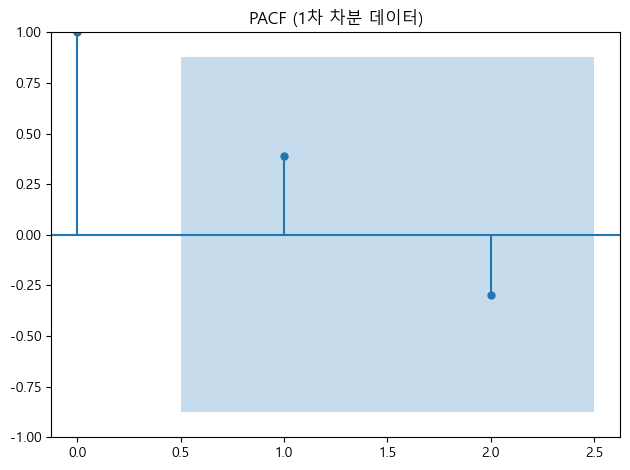

AR(1) 계수: [-5.32907052e-15  8.00000000e-01]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams['font.family'] ="Malgun Gothic"
plt.rcParams['axes.unicode_minus']=False
#  시계열 데이터
Xt = np.array([100, 80, 64, 51.2, 40.96, 32.768])

#  ADF 정상성 검정
adf_result = adfuller(Xt)
print("원시 데이터 ADF Statistic:", adf_result[0])
print("원시 데이터 p-value:", adf_result[1])

#  1차 차분
Xt_diff = np.diff(Xt)
print("1차 차분 결과:", Xt_diff)

#  차분 데이터 ADF 검정
adf_diff_result = adfuller(Xt_diff)
print("차분 데이터 ADF Statistic:", adf_diff_result[0])
print("차분 데이터 p-value:", adf_diff_result[1])
if adf_diff_result[1] < 0.05:
    print("✅ 정상 시계열 (stationary)")
else:
    print("❌ 비정상 시계열 (non-stationary)")

#  PACF (lags=1로 수정)
plt.figure(figsize=(5, 3))
plot_pacf(Xt_diff, lags=2, method='ywm')
plt.title("PACF (1차 차분 데이터)")
plt.tight_layout()
plt.show()


#  AR(1) 모델 적합:pacf 그래프에서 lag1 이후 급격히 줄어듬
model = AutoReg(Xt_diff, lags=1)
model_fit = model.fit()
print("AR(1) 계수:", model_fit.params)


#  AR(1) 계수 해석

AutoReg 결과의 `params`는 아래와 같이 구성됩니다:

| 순번 | 계수 위치        | 의미                                |
|------|------------------|-------------------------------------|
| 0    | `const` (상수항) | 절편(intercept) 또는 상수항 $c$     |
| 1    | `ar.L1`          | 1시차 자기회귀 계수 $\phi_1$       |

---

### ✅ 해당 출력 값

```text
[-5.32907052e-15   8.00000000e-01]


04. 회귀와경사하강.ipynb 파일 참고

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

Xt = np.array([100, 80, 64, 51.2, 40.96, 32.768])
X_lag = Xt[:-1]     # X_{t-1}
Y = Xt[1:]          # X_t
print(X_lag)
print( X_lag.reshape(-1, 1) )
# ====== 방법 1: LinearRegression ======
lr = LinearRegression()
lr.fit(X_lag.reshape(-1, 1), Y)

print("\n LinearRegression 결과:")
print(f"절편(intercept): {lr.intercept_}")
print(f"기울기(coef): {lr.coef_[0]}")

[100.    80.    64.    51.2   40.96]
[[100.  ]
 [ 80.  ]
 [ 64.  ]
 [ 51.2 ]
 [ 40.96]]

🔍 LinearRegression 결과:
절편(intercept): 0.0
기울기(coef): 0.8


In [ ]:
Xt = np.array([100, 80, 64, 51.2, 40.96, 32.768])
Yt = np.array([80, 64, 51.2, 40.96, 32.768, ])